In [5]:
import thinfilm as tm
import material as ml
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
# access material paramater
SiO2_file = pd.read_csv('./example data/SiO2.csv')
SiO2_w = SiO2_file['nm'].values
SiO2_n = SiO2_file['n'].values
SiO2_k = SiO2_file['k'].values
# material imported
SiO2 = ml.Material(SiO2_w, SiO2_n, SiO2_k, SiO2_w)
#wl = np.linspace(400,700,301)
#print(SiO2.nvalues(wl))
# set Cauchy model
SiO2_C_hypo = lambda th, wl: th[0]+th[1]/(wl)**2
# figure of merit
fom = lambda th: sum(abs(SiO2_C_hypo(th, SiO2_w) - SiO2_n))
#fom(SiO2_C_hypo(th))

In [20]:
sol = minimize(fom, [1e2,1e2], method = 'Nelder-Mead')
print(sol.x)
print(sol.message)

[1.50496906e+00 6.92849995e+03]
Optimization terminated successfully.


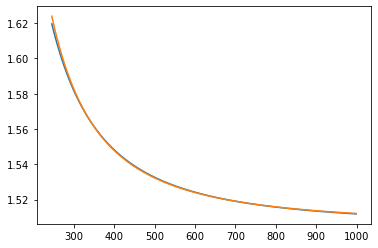

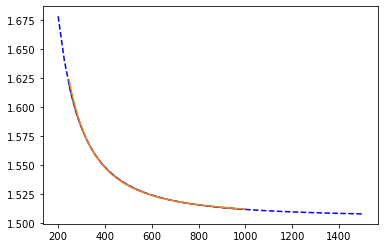

In [21]:
plt.plot(SiO2_w, SiO2_C_hypo(sol.x, SiO2_w))
plt.plot(SiO2_w, SiO2_n)
plt.show()
###
wl = np.linspace(200, 1500)
plt.plot(SiO2_w, SiO2_C_hypo(sol.x, SiO2_w))
plt.plot(wl, SiO2_C_hypo(sol.x, wl), '--b')
plt.plot(SiO2_w, SiO2_n)
plt.show()
